# Нормализация данных

В предыдущем уроке мы начали знакомство с реляционной моделью данных. Основной ее смысл в эффективном хранении и использовании данных внутри БД. Чтобы некие данные из реального мира удовлетворяли требованиям реляционной модели, они не должны храниться в виде разрозненного набора обьемных двумерных таблиц. Для того чтобы эффективно спроектировать хранение данных, в реляционной модели есть понятие нормальная форма.

**Нормальная форма** — свойство отношения в реляционной модели данных, характеризующее его с точки зрения избыточности, потенциально приводящей к логически ошибочным результатам выборки или изменения данных. Нормальная форма определяется как совокупность требований, которым должно удовлетворять отношение.

Процесс преобразования отношений в БД к нормальным формам называется нормализацией. Целью нормализации является минимизация логической избыточности, увеличение производительности, увеличение или уменьшение физического объема данных. Стоит отметить, что в реальности используется как нормализация, так и денормализация. Это обусловленно фактом, что разные СУБД используют разные движки и концепции хранения данных. Например хранить сильно нормализованные данные в хадупе является очень плохой идеей, так как для получения плоской таблицы (представления) нужно будет совершить много джоинов. Хадуп, в силу своих архитектурных особенностей, плохо выполняет большое количество джинов, что приведет к большому времени обработки данных.

## 1 НФ

Отношение находится в **первой нормальной форме** (сокращённо 1НФ), если все его атрибуты атомарны, то есть если ни один из его атрибутов нельзя разделить на более простые атрибуты, которые соответствуют каким-то другим свойствам описываемой сущности. В реляционной модели отношение находится всегда в 1НФ по определению.

Таблица 1 не является отношением и не находится в 1НФ, так как у Иванова атрибут телефон не атомарен. Чтобы привести таблицу к 1НФ нужно декомпозировать кортеж Иванова на два других (Таблица 2).

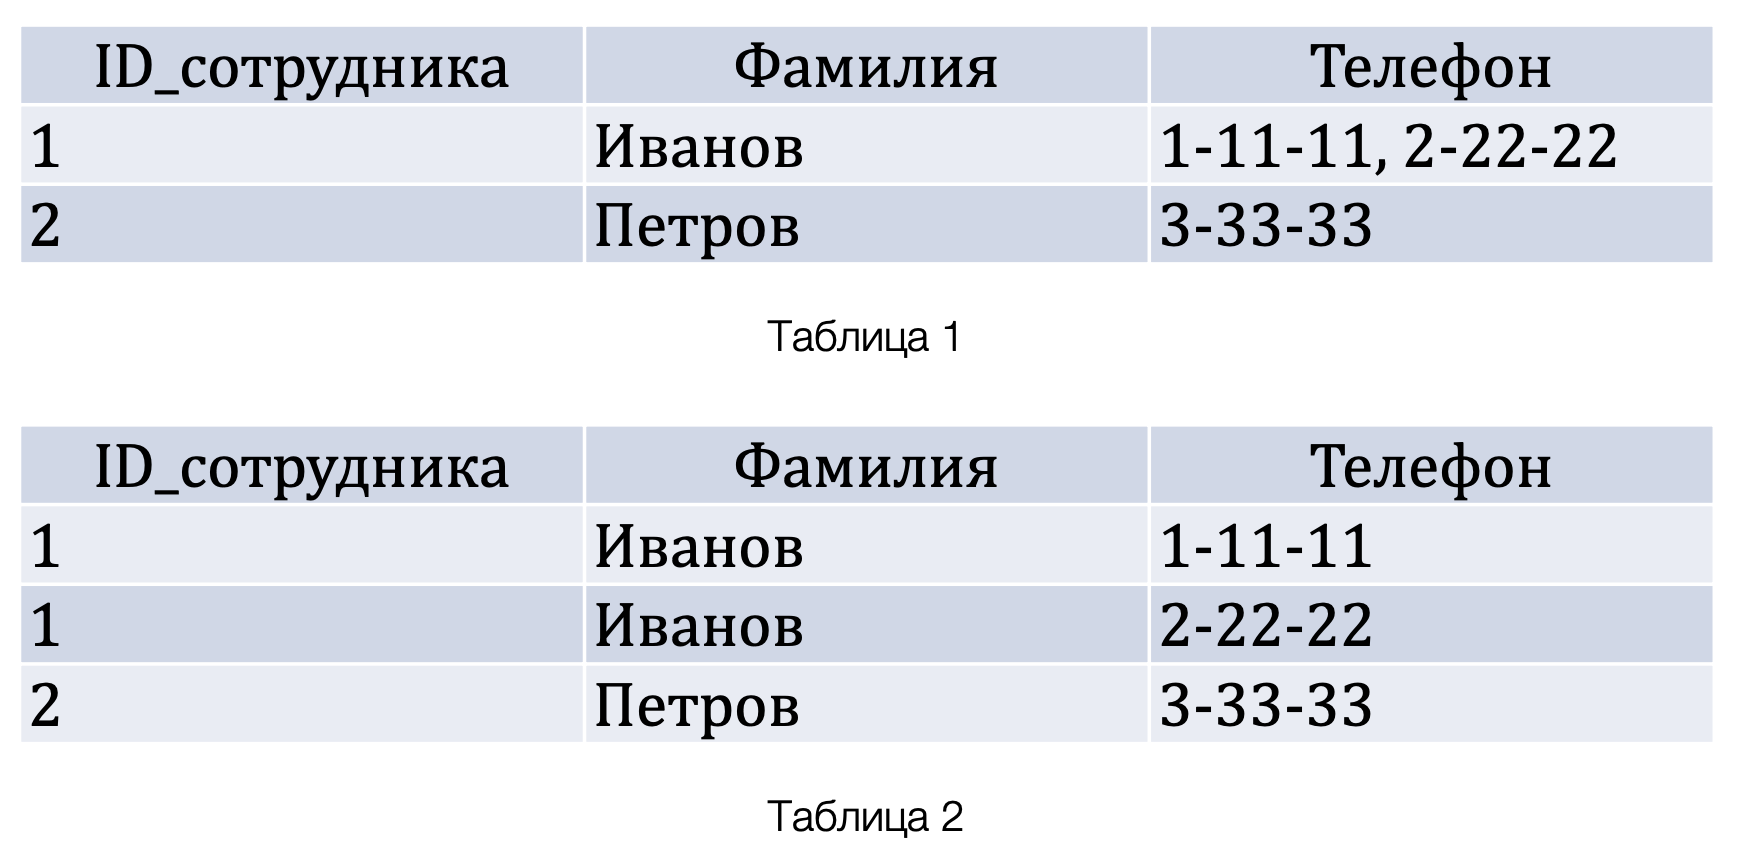

## 2 НФ

Отношение находится во **второй нормальной форме** (сокращённо 2НФ) тогда и только тогда, когда оно находится в первой нормальной форме и каждый его неключевой атрибут неприводимо (функционально полно) зависим от первичного ключа.

Для полного понимания нужно дать определение функциональной зависимости и потенциального ключа.

**Потенциальный ключ** — в реляционной модели данных — подмножество атрибутов отношения, удовлетворяющее требованиям уникальности и неизбыточности.
<br>Уникальность означает, что не существует двух кортежей данного отношения, в которых значения этого подмножества атрибутов совпадают.
<br>Неизбыточность означает, что в составе потенциального ключа отсутствует меньшее подмножество атрибутов, удовлетворяющее условию уникальности. Иными словами, если из потенциального ключа убрать любой атрибут, он утратит свойство уникальности.
<br>Поскольку все кортежи в отношении по определению уникальны, в нём всегда существует хотя бы один потенциальный ключ (например, включающий все атрибуты отношения).
<br>Потенциальный ключ, состоящий из одного атрибута, называется простым. Потенциальный ключ, состоящий из нескольких атрибутов, называется составным. Отношение может иметь несколько потенциальных ключей. Традиционно, один из потенциальных ключей объявляется первичным (**primary key**), а остальные - альтернативными.

**Функциональная зависимость** между атрибутами (множествами атрибутов) X и Y означает, что для любого допустимого набора кортежей в данном отношении каждому значению X соответсвует лишь одно значение Y. Обозначение: {X} -> {Y}.

**Неприводимость** означает, что в составе потенциального ключа отсутствует меньшее подмножество атрибутов, от которого можно также вывести данную функциональную зависимость. Для неприводимой функциональной зависимости часто используется эквивалентное понятие «полная функциональная зависимость».

Первичным ключом отношения представленного в таблице 3 будет являться {ID_сотрудника, ID_проекта}. В данном отношении существуют следующие функциональные зависимости:

    • {ID_сотрудника} -> {Фамилия}
    • {ID_сотрудника} -> {ID_отдела}
    • {ID_сотрудника} -> {Телефон} • {ID_проекта} -> {Проект}

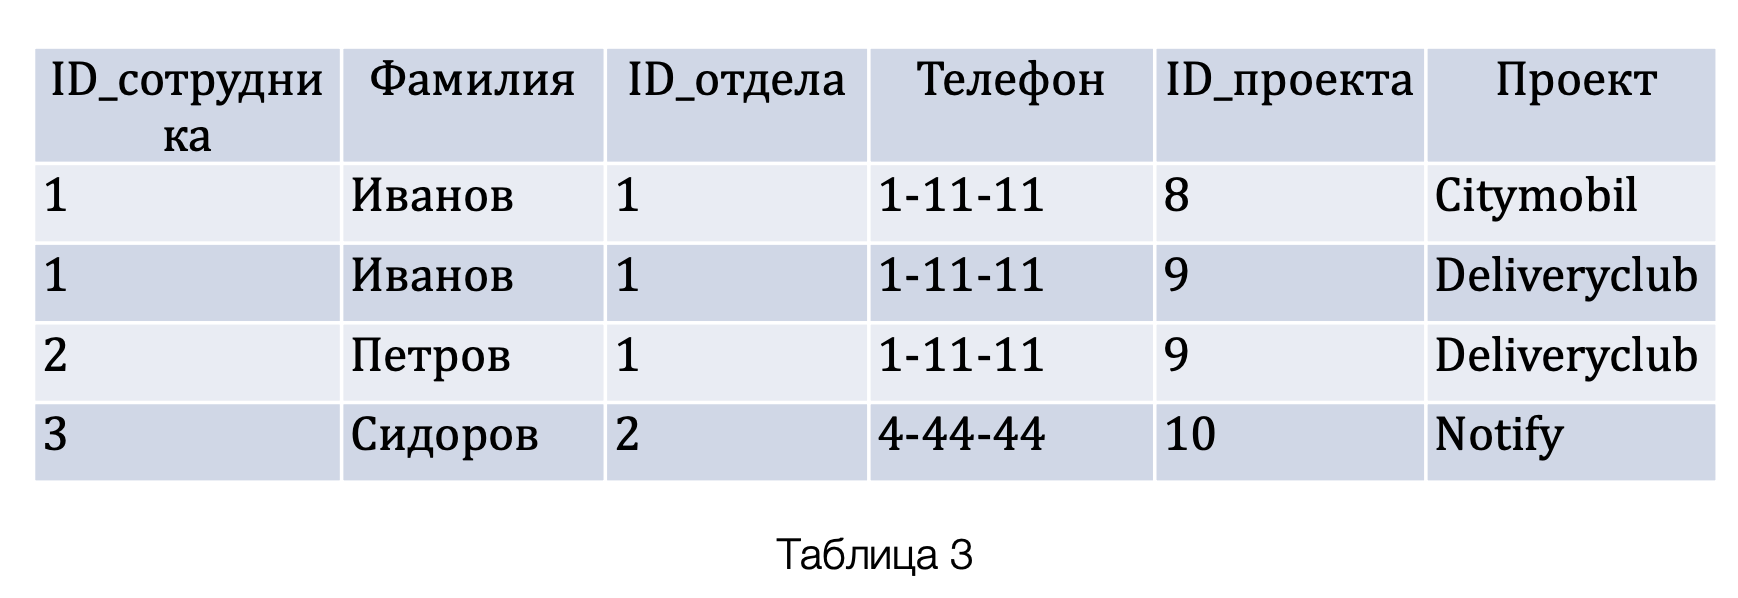

Стоить заметить что это не все функциональные зависимости. Остальные будут рассмотрены ниже когда мы будем приводить отношение к 3НФ. Наличие таких функциональных зависимостей нарушает условие неприводимости, следовательно это отношение находится в 1НФ, но не в 2НФ. Чтобы привести данное отношение к 2НФ нужно декомпозировать его на три других отношения (Таблица 4,
Таблица 5, Таблица 6).

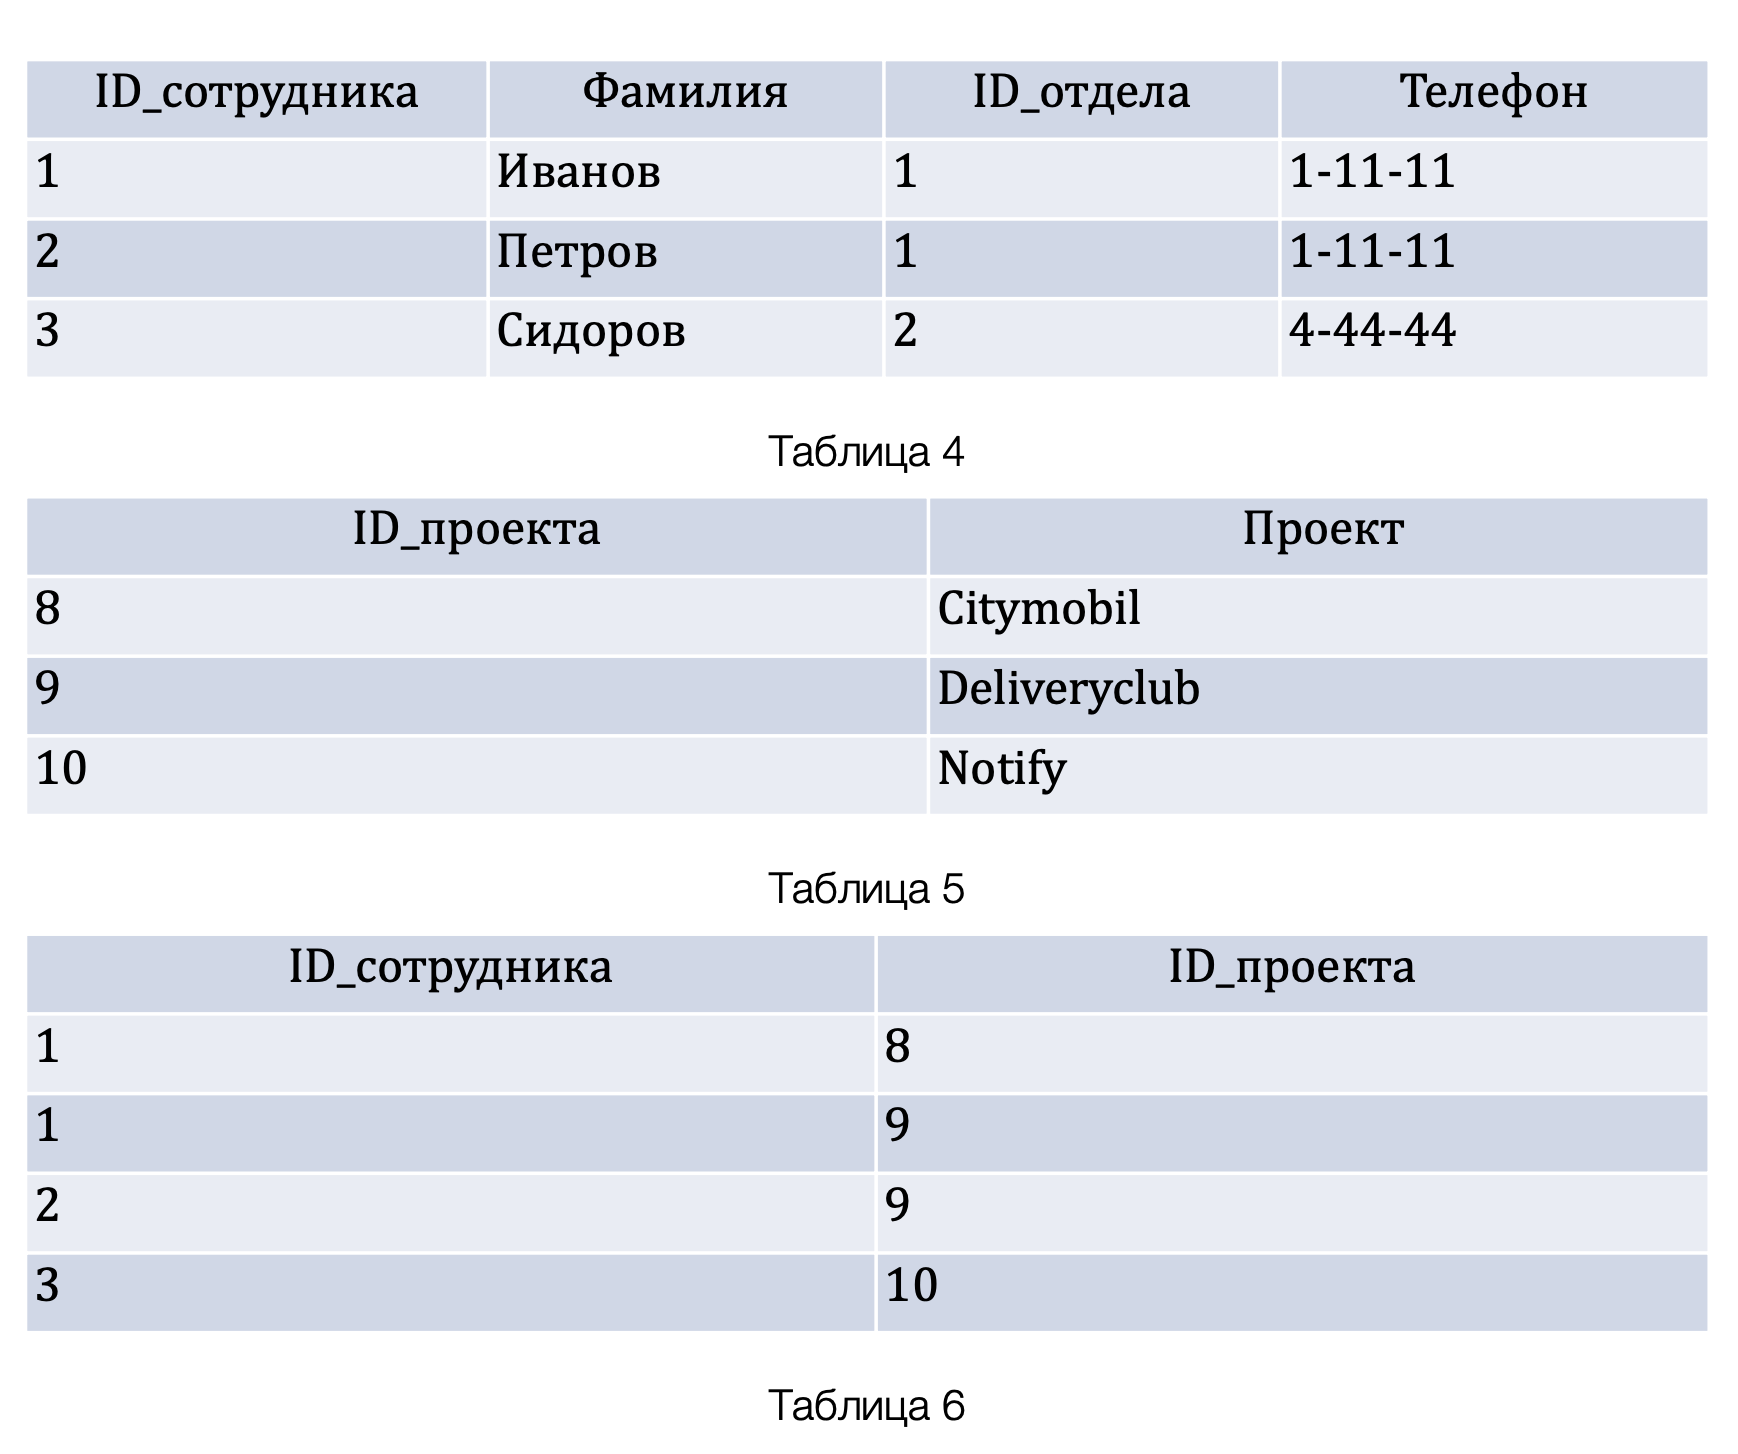

## 3 НФ

Отношение находится в **третьей нормально форме** (3НФ), когда находится во 2НФ и каждый не ключевой атрибут нетранзитивно зависит от первичного ключа.

Отношение в таблице 4 имеет следующие функциональные зависимости: 
    
    • {ID_сотрудника} -> {Фамилия}
    • {ID_сотрудника} -> {ID_отдела}
    • {ID_отдела} -> {Телефон}
    • {ID_сотрудника} -> {Телефон}

В данном примере будем считать что у сотрудников нет личного телефона, поэтому телефон зависит от ID_отдела, так как он общий. Зависимость {ID_сотрудника} -> {Телефон} является транзитивной, так как нет прямой зависимости от человека к телефону. Из этого следует что отношение находится в 2НФ, но не в 3НФ. Чтобы привести отношение к 3НФ нужно декомпозировать его на два других (Таблица 7, Таблица 8).

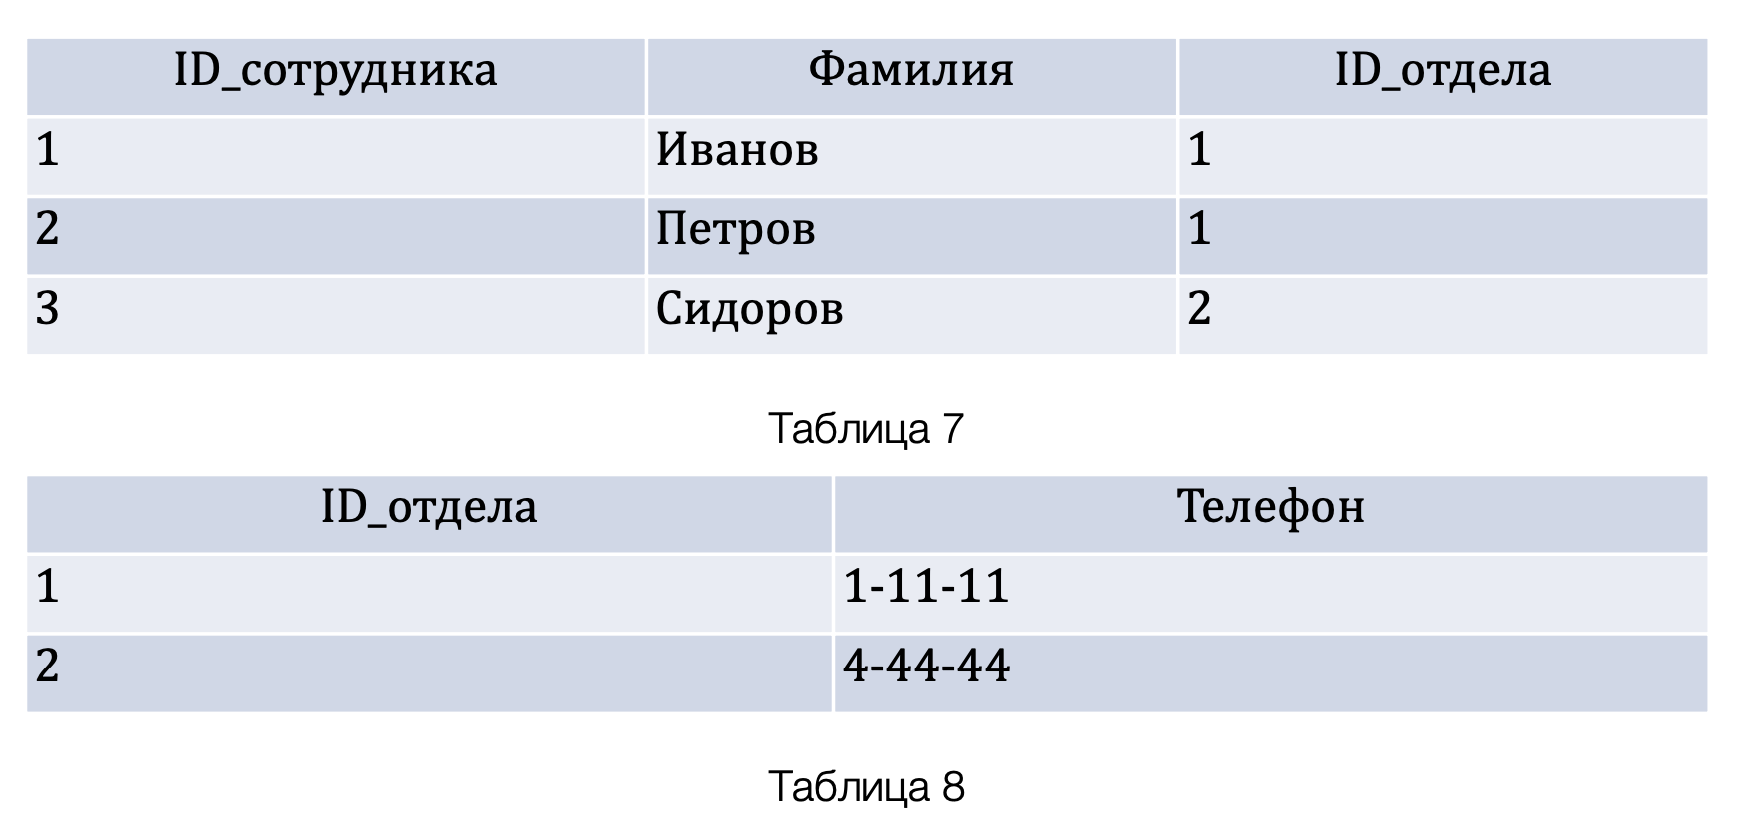

## НФБК

Определение 3НФ не совсем подходит для следующих отношений: 

    1) отношение имеет две или более потенциальных ключа;
    2) два и более потенциальных ключа являются составными;
    3) они пересекаются, т.е. имеют хотя бы один атрибут.
Для отношений, имеющих один потенциальный ключ (первичный), НФБК является 3НФ.

Отношение находится в **нормальной форме Бойса-Кодда** (НФБК), когда каждая нетривиальная и неприводимая слева функциональная зависимость обладает потенциальным ключом в качестве детерминанта.

Для полного понимания нужно дать определение тривиальной функциональной зависимости и неприводимой слева функциональной зависимости.

Функциональная зависимость **тривиальна** тогда и только тогда, когда её правая (зависимая) часть является подмножеством её левой части (детерминанта).

Функциональная зависимость называется **неприводимой слева**, если ни один атрибут не может быть опущен из её детерминанта без нарушения зависимости (иными словами, детерминант неизбыточен).

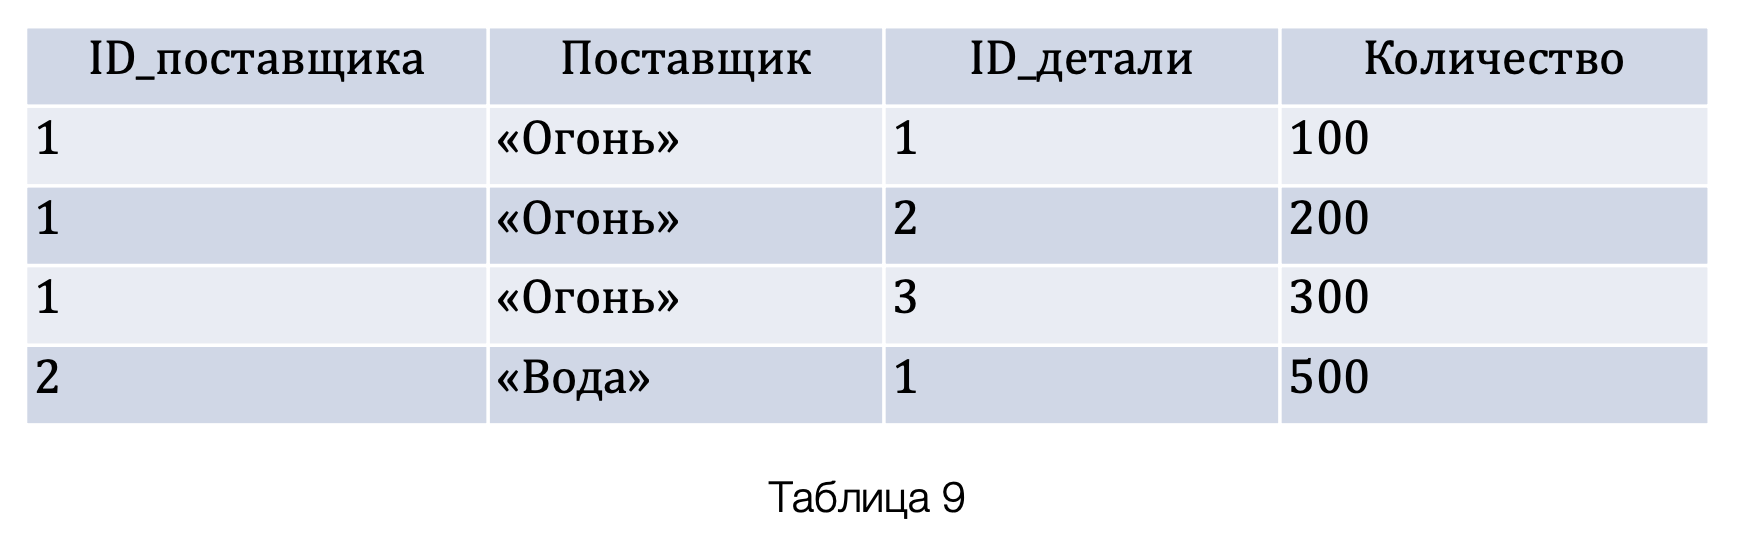

Отношение в таблице 9 имеет два потенциальных ключа:

    1. {ID_поставщика, ID_детали}
    2. {Поставщик, ID_детали}
Это отношение имеет следующие функциональные зависимости:

    • {ID_поставщика} -> {Поставщик} - наименование поставщика зависит от идентификатора поставщика
    • {Поставщик} -> {ID_поставщика} - идентификатор поставщика зависит от наименования поставщика 
    • {ID_поставщика, ID_детали} -> {Поставщик} - наименование поставщика зависит от первого ключа
    • {ID_поставщика, ID_детали} -> {Количество} - поставляемое количество зависит от первого ключа
    • {Поставщик, ID_детали} -> {ID_поставщика} - идентификатор поставщика зависит от второго ключа
    • {Поставщик, ID_детали} -> {Количество} - поставляемое количество зависит от второго ключа

Обратим внимание, на зависимости ({ID_поставщика, ID_детали} -> {Поставщик}, {Поставщик, ID_детали} -> {ID_поставщика}). Эти зависимости являются приводимыми слева, так как можно опустить ID_детали без нарушения зависимости и смысла. Для того чтобы привести это отношение к НФБК, нужно декомпозировать ее на два других отношения (таблица 10, таблица 11).

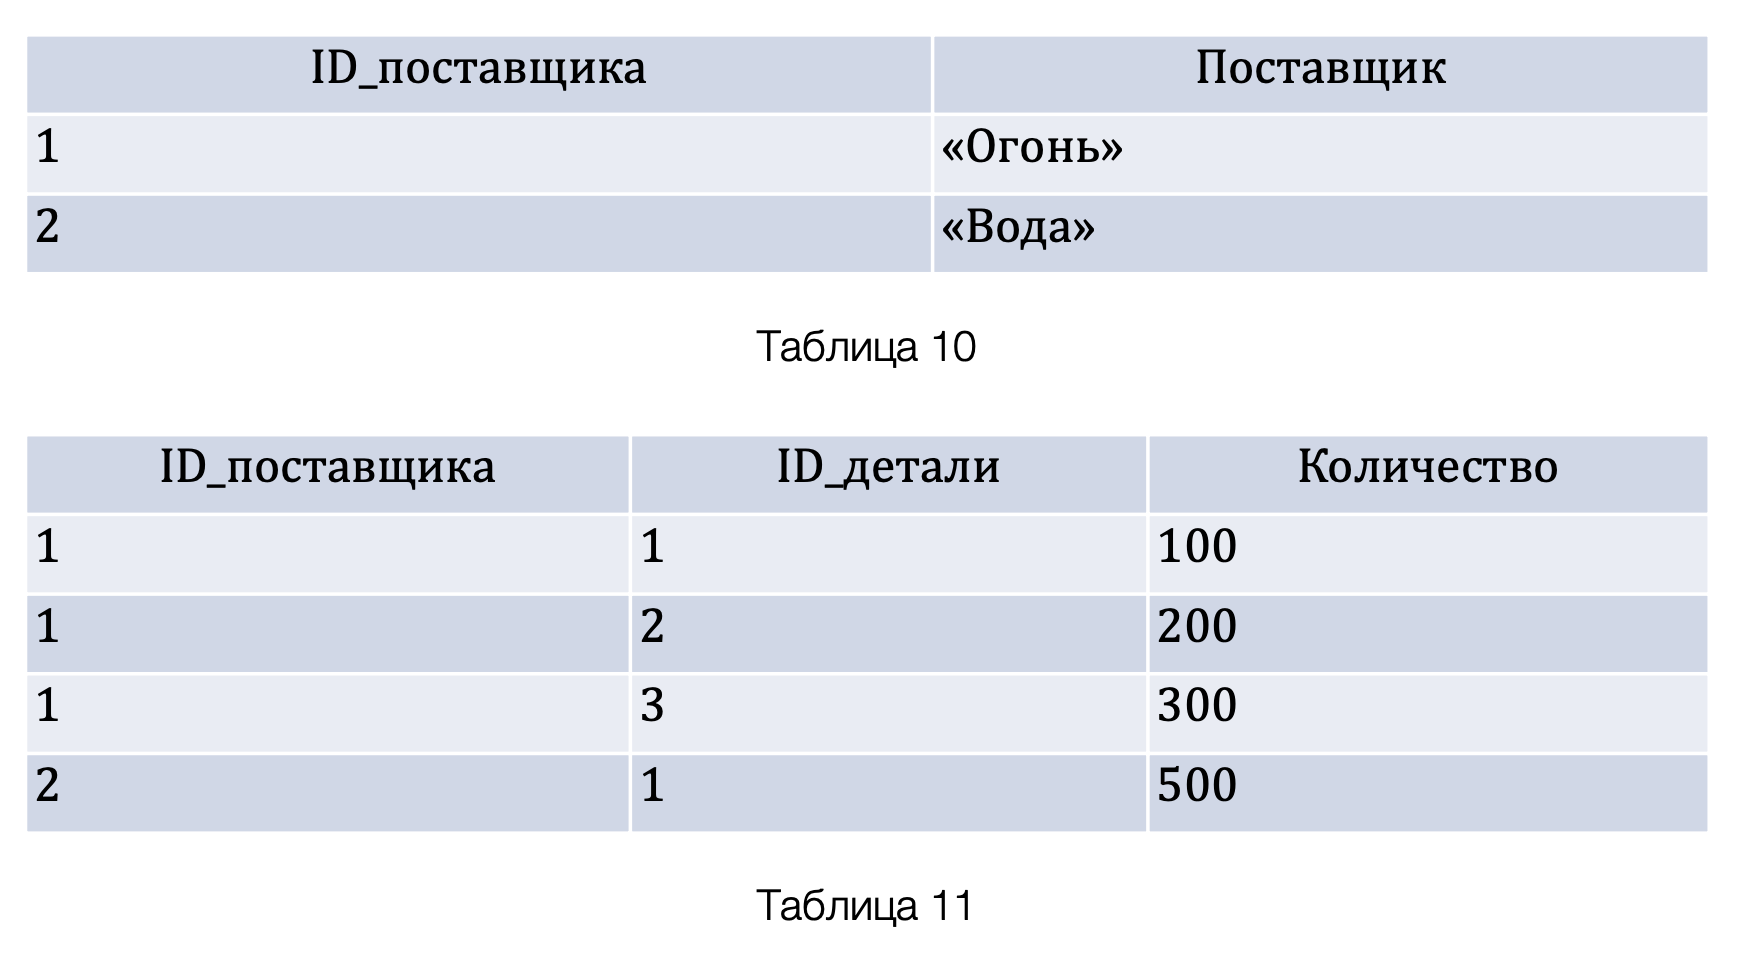

Для таблицы 10 справедливы следующие функциональные зависимости:

    • {ID_поставщика} -> {Поставщик}
    • {Поставщик} -> {ID_поставщика}
Для таблицы 11:
    
    • {ID_поставщика, ID_детали} -> {Количество}

Теперь отношение удовлетворяет всем условиям НФБК.

## 4НФ

Отношение находится в **четвертой нормальной форме** (4НФ) тогда и только тогда, когда отношение находится в НФБК и не содержит нетривиальных многозначных зависимостей.

Многозначная зависимость X->>Y|Z называется **нетривиальной многозначной зависимостью**, если не существует функциональных
зависимостей X->Y и Y->Z.

Рассмотрим отношение в таблице 12. Единственным ключом будет являться {Студент, Факультет, Предмет}. Для каждого факультета (для каждого значения из X) каждый поступающий на него абитуриент (значение из Y) сдает один и тот же список предметов (набор значений из Z), и для каждого факультета (для каждого значения из X) каждый сдаваемый на факультете экзамен (значение из Z) сдается одним и тем же списком абитуриентов (набор значений из Y). Из этого следует что отношение обладает нетривиальной функциональной зависимостью {Факультет} ->> {Студент}| {Предмет}, следовательно не находится в 4НФ. 

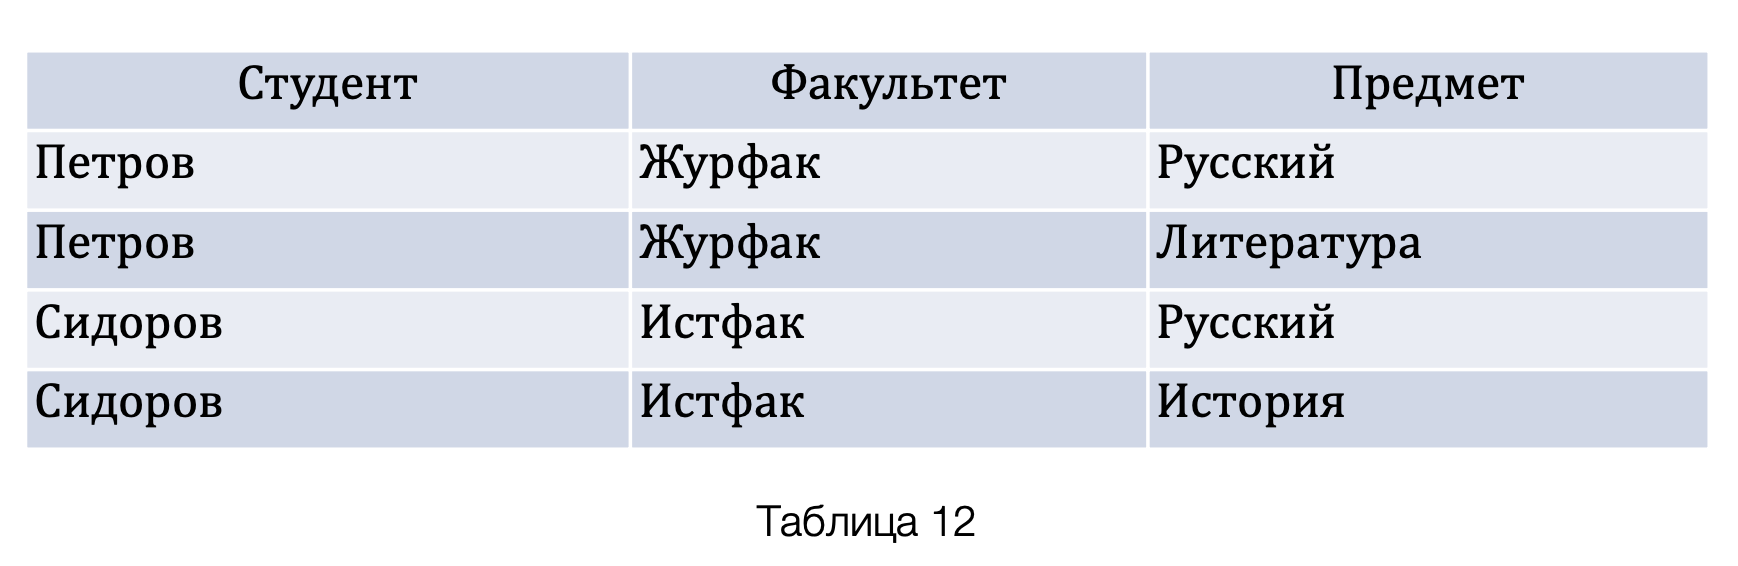

Для того чтобы привести это отношение к 4НФ, декомпозируем его два (таблица 13, таблица 14).

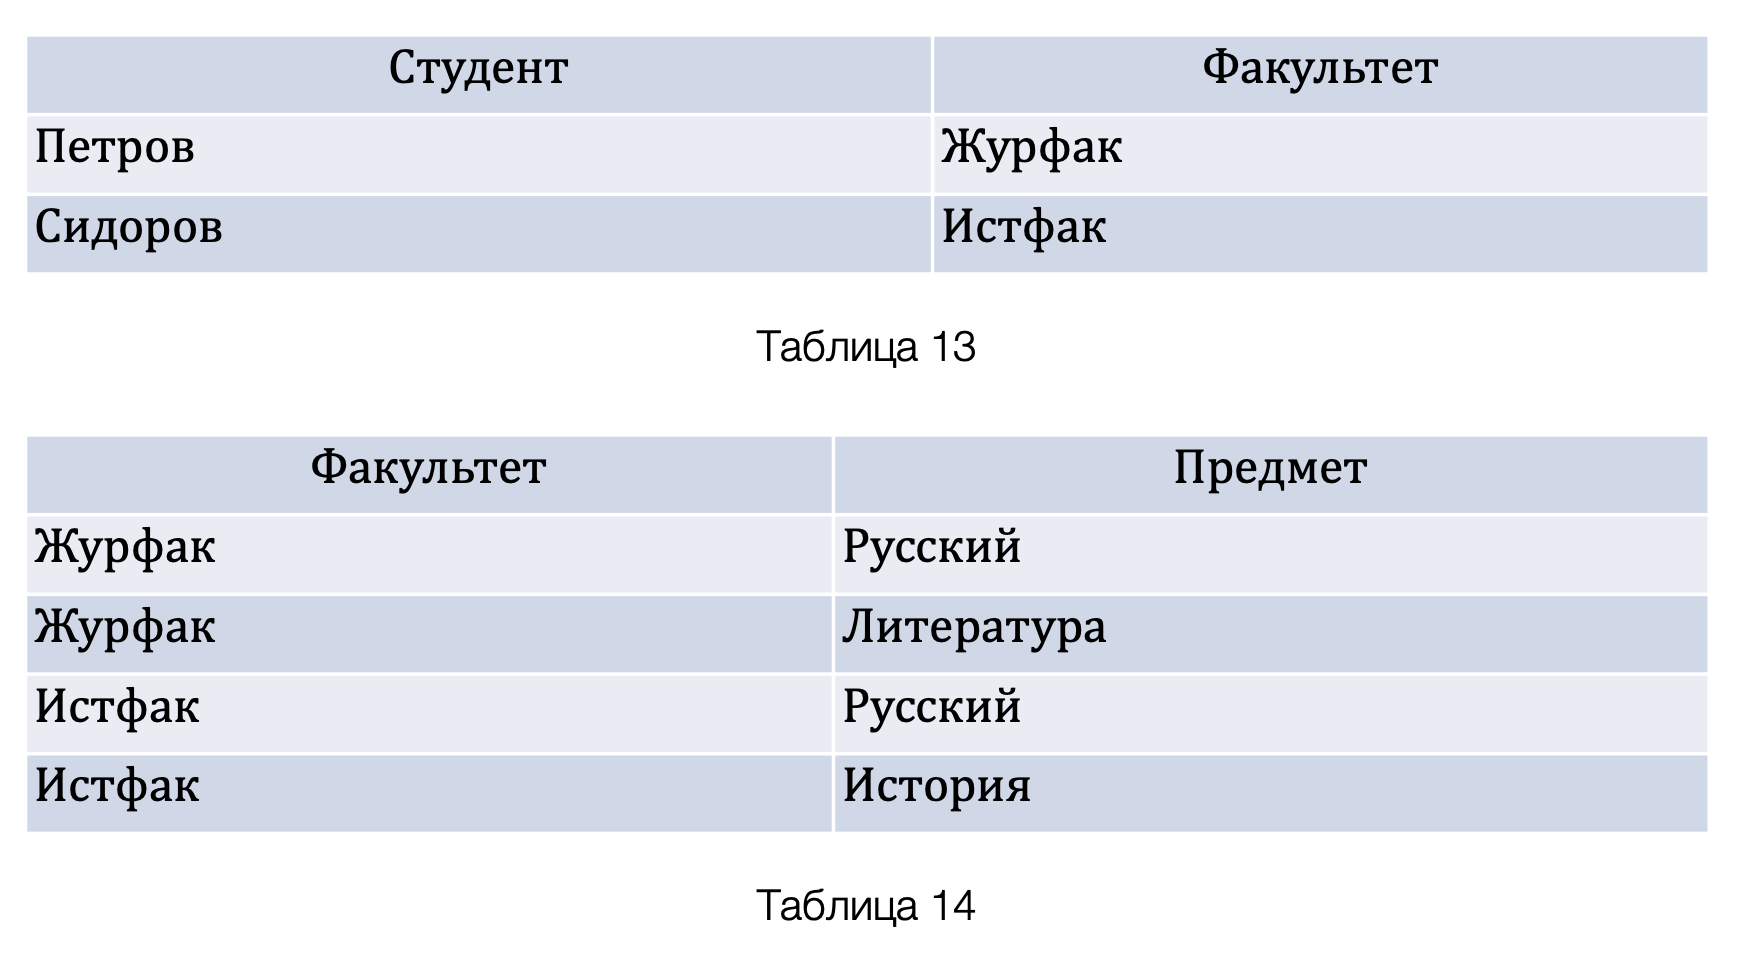

Отношения с нетривиальными многозначными зависимостями возникают, как правило, в результате естественного соединения двух отношений по общему полю, которое не является ключевым ни в одном из отношений. Фактически это приводит к попытке хранить в одном отношении информацию о двух независимых сущностях.

## 5НФ

Отношение находится в **пятой нормальной форме** (5НФ) тогда и только тогда, когда любая имеющаяся зависимость соединения является тривиальной.
Отношение не находится в 5НФ, если в отношении найдется нетривиальная зависимость соединения.

Пусть R является отношением, а A,B , ...,Z - произвольными (возможно пересекающимися) подмножествами множества атрибутов отношения . Тогда отношение R удовлетворяет зависимости соединения *(A,B,...,Z) тогда и только тогда, когда оно равносильно соединению всех своих проекций с подмножествами атрибутов A,B , ...,Z т.е.
R = R[A] JOIN R[B] JOIN .... R[Z]

Зависимость соединения называется тривиальной зависимостью соединения, если выполняется одно из условий:

    • либо все множества атрибутов содержат потенциальный ключ отношения
    • либо одно из множеств атрибутов совпадает со всем множеством атрибутов отношения

Очень редко отношение, находящееся в 4НФ, не соответствует 5НФ. Это те ситуации, в которых реальные правила, ограничивающие допустимые комбинации атрибутов, никак не выражены в структуре отношения. В таком случае, если отношение не приведено к 5НФ, бремя обеспечения логической целостности данных отчасти перекладывается на приложение, отвечающее за добавление, удаление и изменения данных. В этом случае существует риск возникновения ошибок. Пятая нормальная форма исключает возникновение таких аномалий.

Рассмотрим отношение в таблице 15. Предположим, что один и тот же сотрудник может работать в нескольких отделах и работать в каждом отделе над несколькими проектами. Первичным ключом этого отношения является полная совокупность его атрибутов, отсутствуют функциональные и многозначные зависимости. Отношение находится в 4НФ.

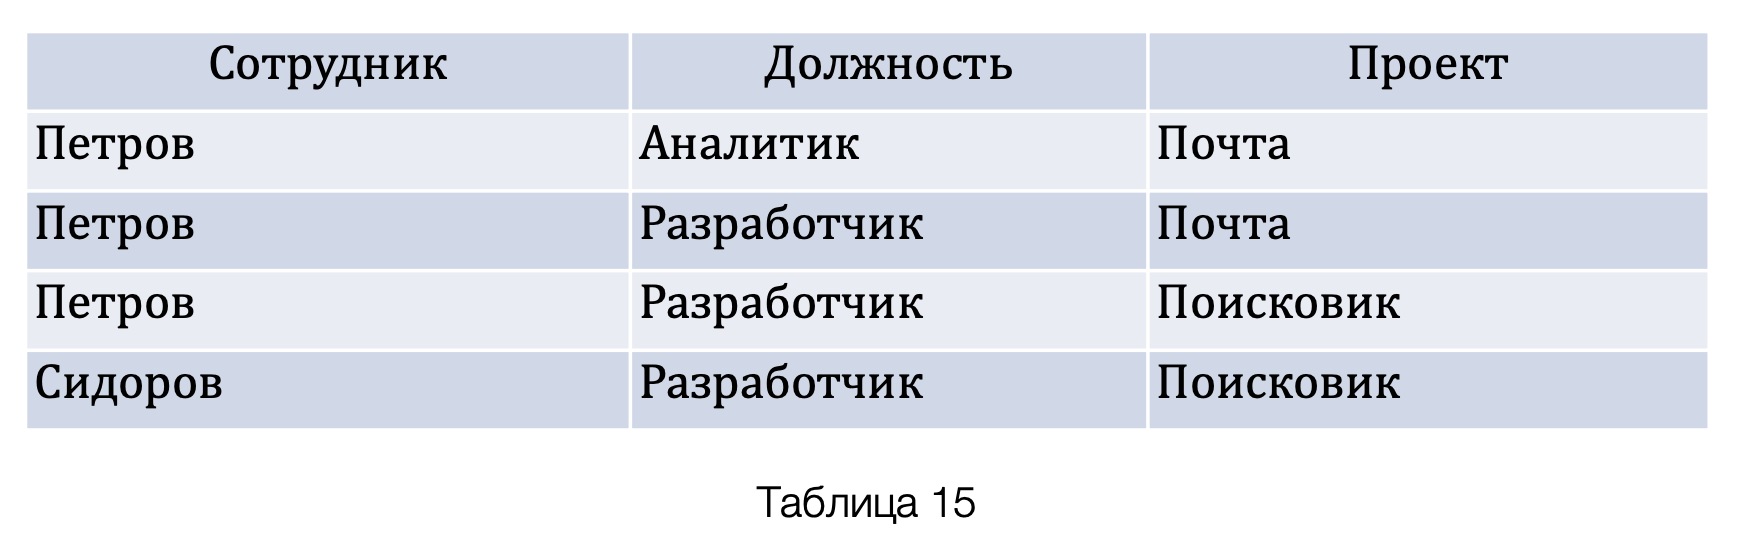

Однако существует вероятность того, что в таблицу будут занесены данные о том, что Сидоров занял должность аналитиком в проекте Поисковик. Хотя он таковым не является. Это как раз и является правилом из реального мира ограничивающим комбинацию атрибутов.

Предположим что существует зависимость соединения *({Сотрудник, Должность}, {Сотрудник, Проект}, {Должность, Проект}). Такая зависимость соединения будет являться нетривиальной, поскольку подмножества {Сотрудник, Должность}, {Сотрудник, Проект}, {Должность, Проект} не содержат потенциальный ключ отношения. А значит отношение не находится в 5НФ. Для того, чтобы привести его к 5НФ, нужно декомпозировать на три других отношения (таблица 16, таблица 17, таблица 18)

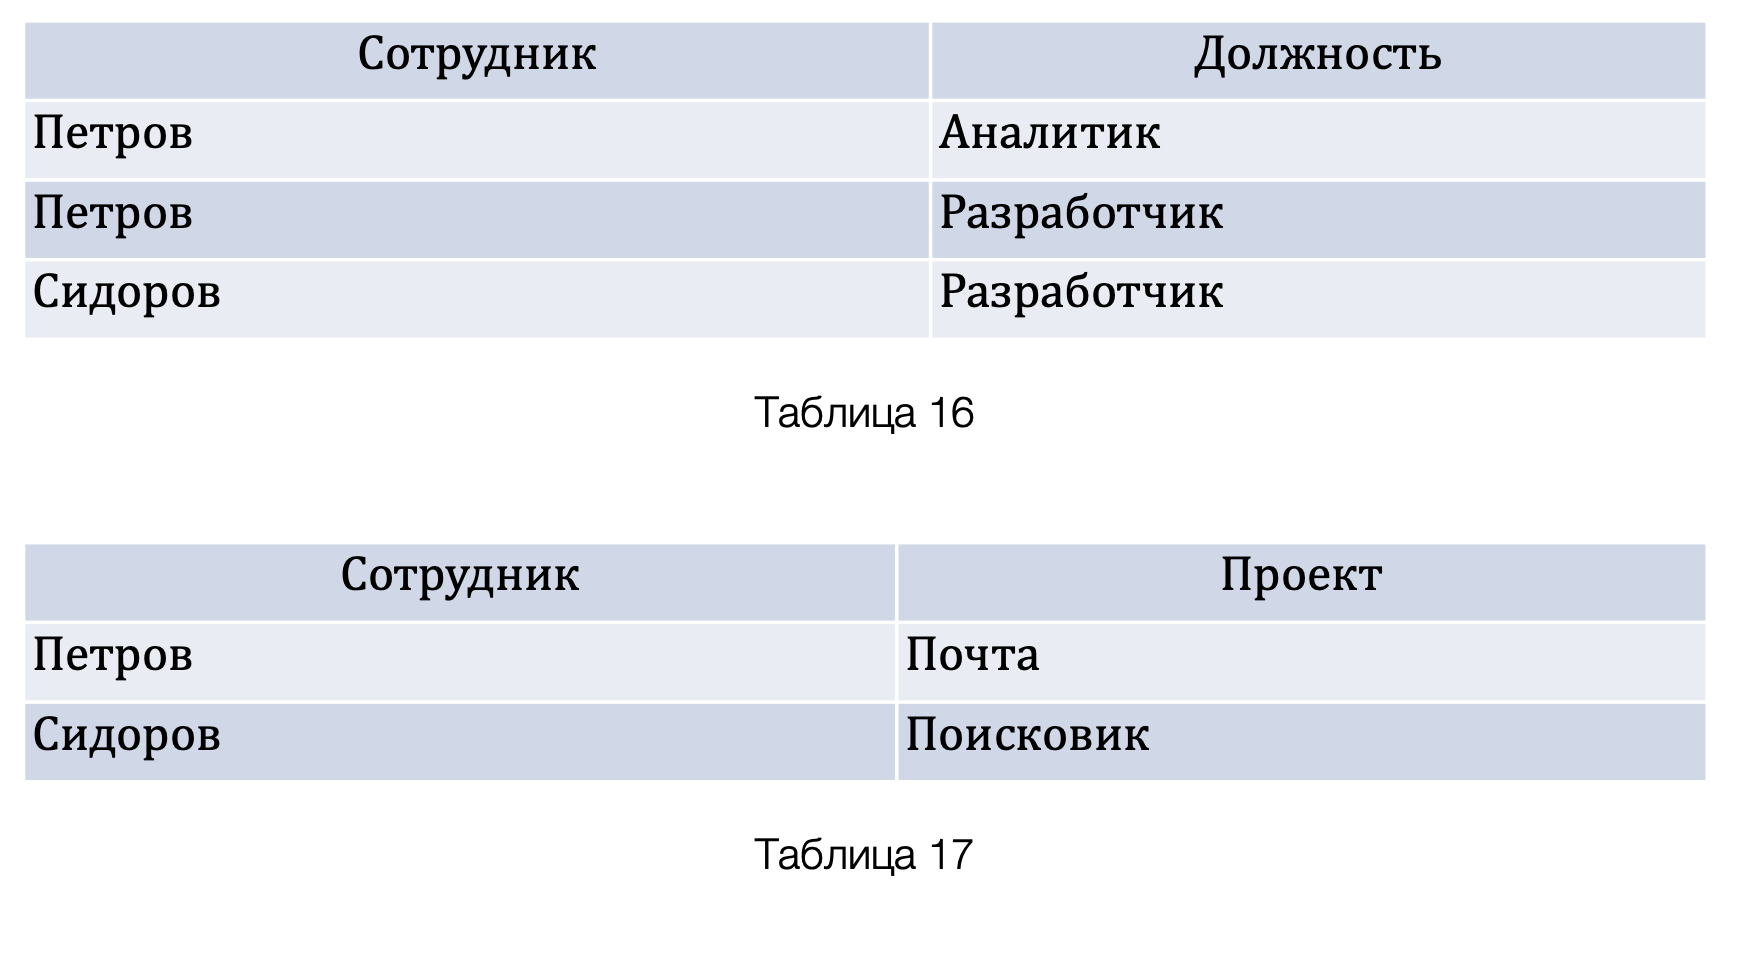

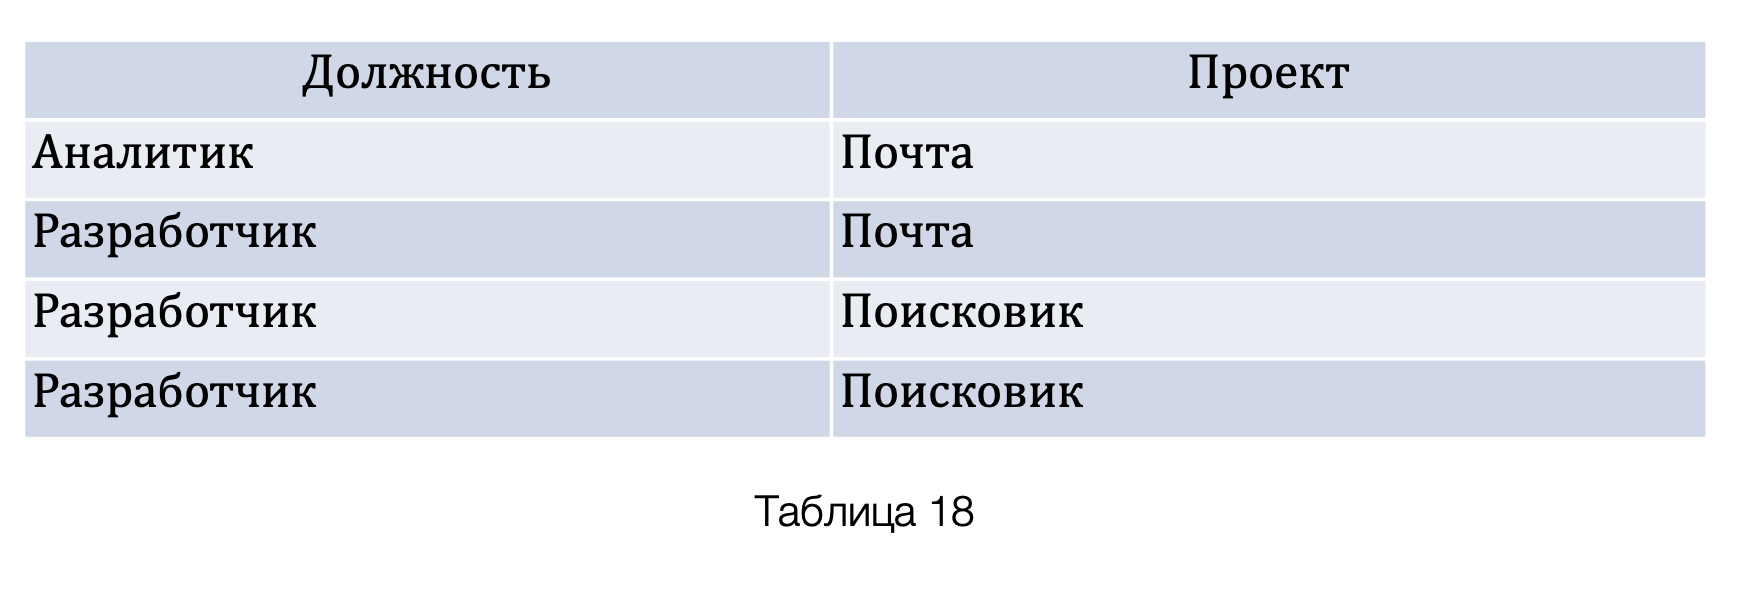

## 6НФ

Переменная отношения находится в **шестой нормальной форме** 6НФ тогда и только тогда, когда она удовлетворяет всем нетривиальным зависимостям соединения. Другими словами переменная находится в 6НФ тогда и только тогда, когда она неприводима, то есть не может быть подвергнута дальнейшей декомпозиции без потерь.

6НФ нашла применение в хронологических базах данных. **Хронологическая база данных** может быть неформально определена как база, которая содержит исторические данные наряду с текущими данными или вместо них. В отличии от обычной, нехронологической базы данных, которая хранит только текущие данные.

Рассмотрим отношение в таблице 19. Это пример таблицы хронологической базы данных. Стоит обратить внимание на атрибут *since_dt*, в котором хранится информация о дате, с которой можно считать кортеж валидным.

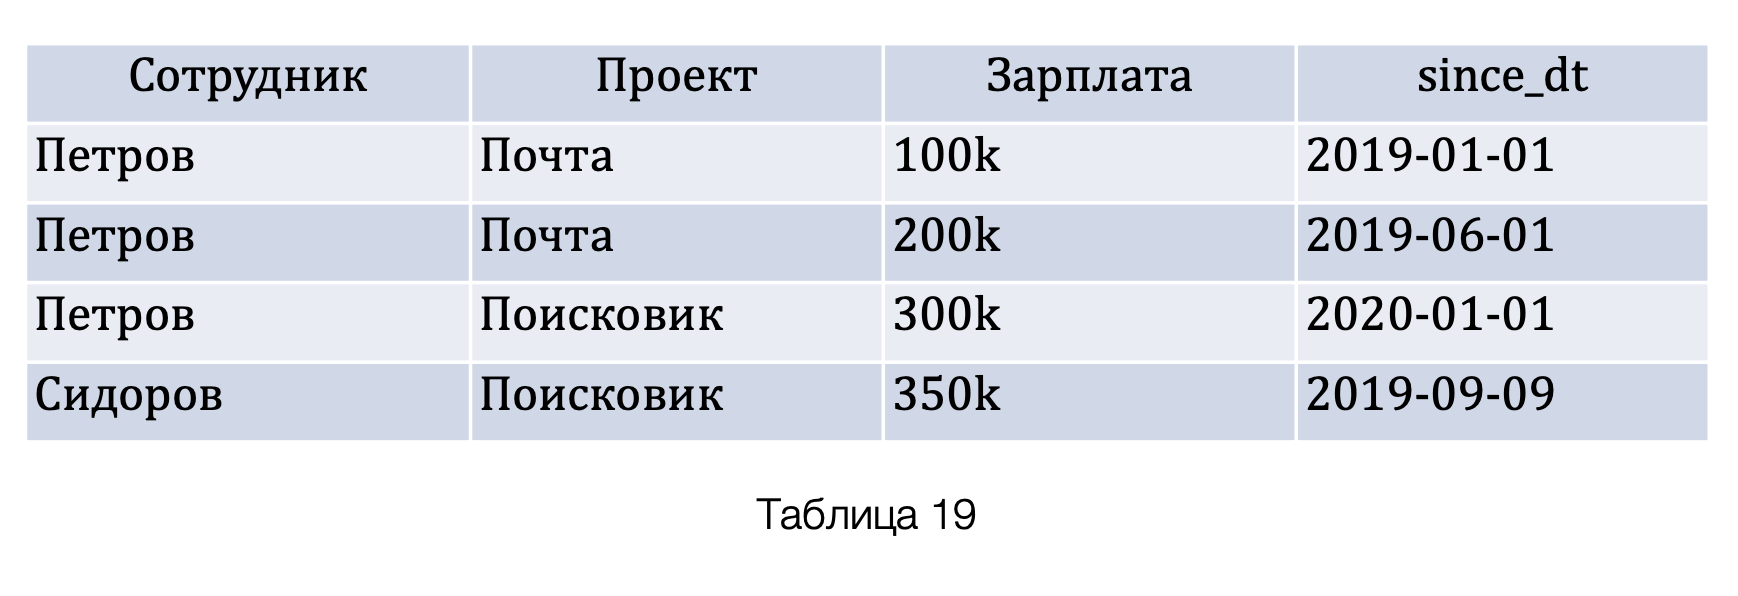

Ключом отношения будет {Сотрудник, since_dt}. Отношение находится в 5НФ, так как все зависимости соеднинения являются тривиальными (все подмножества будут содержать потенциальный ключ). Однако данное отношение можно декомпозировать без потерь на два других (таблица 20, таблица 21), следовательно оно не находится в 6НФ. Дальнейшая декомпозиция невозможна, поэтому отношения в таблицах 20, 21 будут находится в 6НФ.

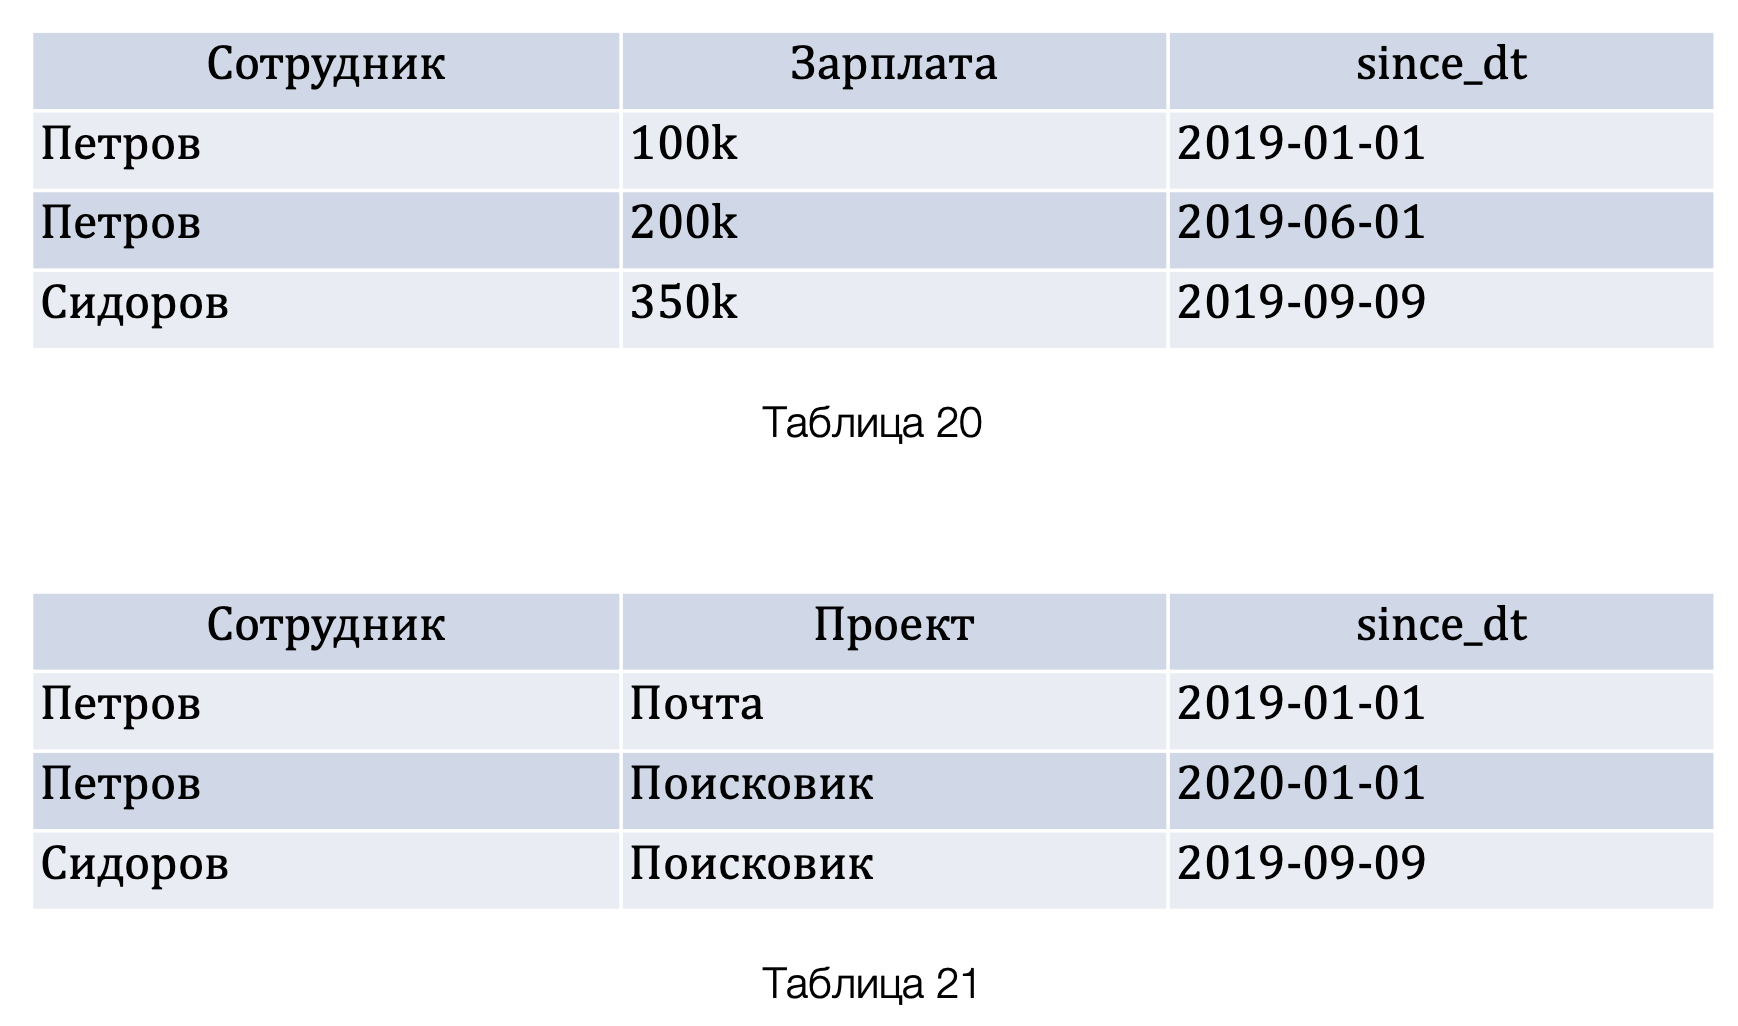

# Архитектура хранилища данных

Мы познакомились с концептуальной, логической и физической моделью данных. По сути это последовательные шаги в проектировании хранилища данных. Далее давайте выясним какие существуют основные архитектурные концепции к построению хранилища.


Поскольку хранилище данных зачастую строится постепенно, мы должны быть готовыми к его расширению, изменению и т. д. Другими словами нам нужен адаптивный механизм, который будет подстраиваться под изменение источников данных, требования заказчиков, изменение модели данных, ведь все эти параметры зачастую меняются с течением времени. А так же чем дольше «живет» хранилище, тем более массивные объемы данных оно в себе накапливает. Здесь нам приходит на помощь уровневая архитектура.

**Уровневая архитектура** – это средство борьбы со сложностью системы – каждый последующий уровень абстрагирован от сложностей внутренней реализации предыдущего. Такой подход позволяет выделять однотипные задачи и решать их единообразным образом, не изобретая каждый раз «велосипед» с нуля.

Схематично концептуальная архитектурная схема представлена на рисунке. Это упрощенная схема, которая отражает лишь ключевую идею – концепцию, без подробностей, которые будут возникать при более глубокой проработке деталей.

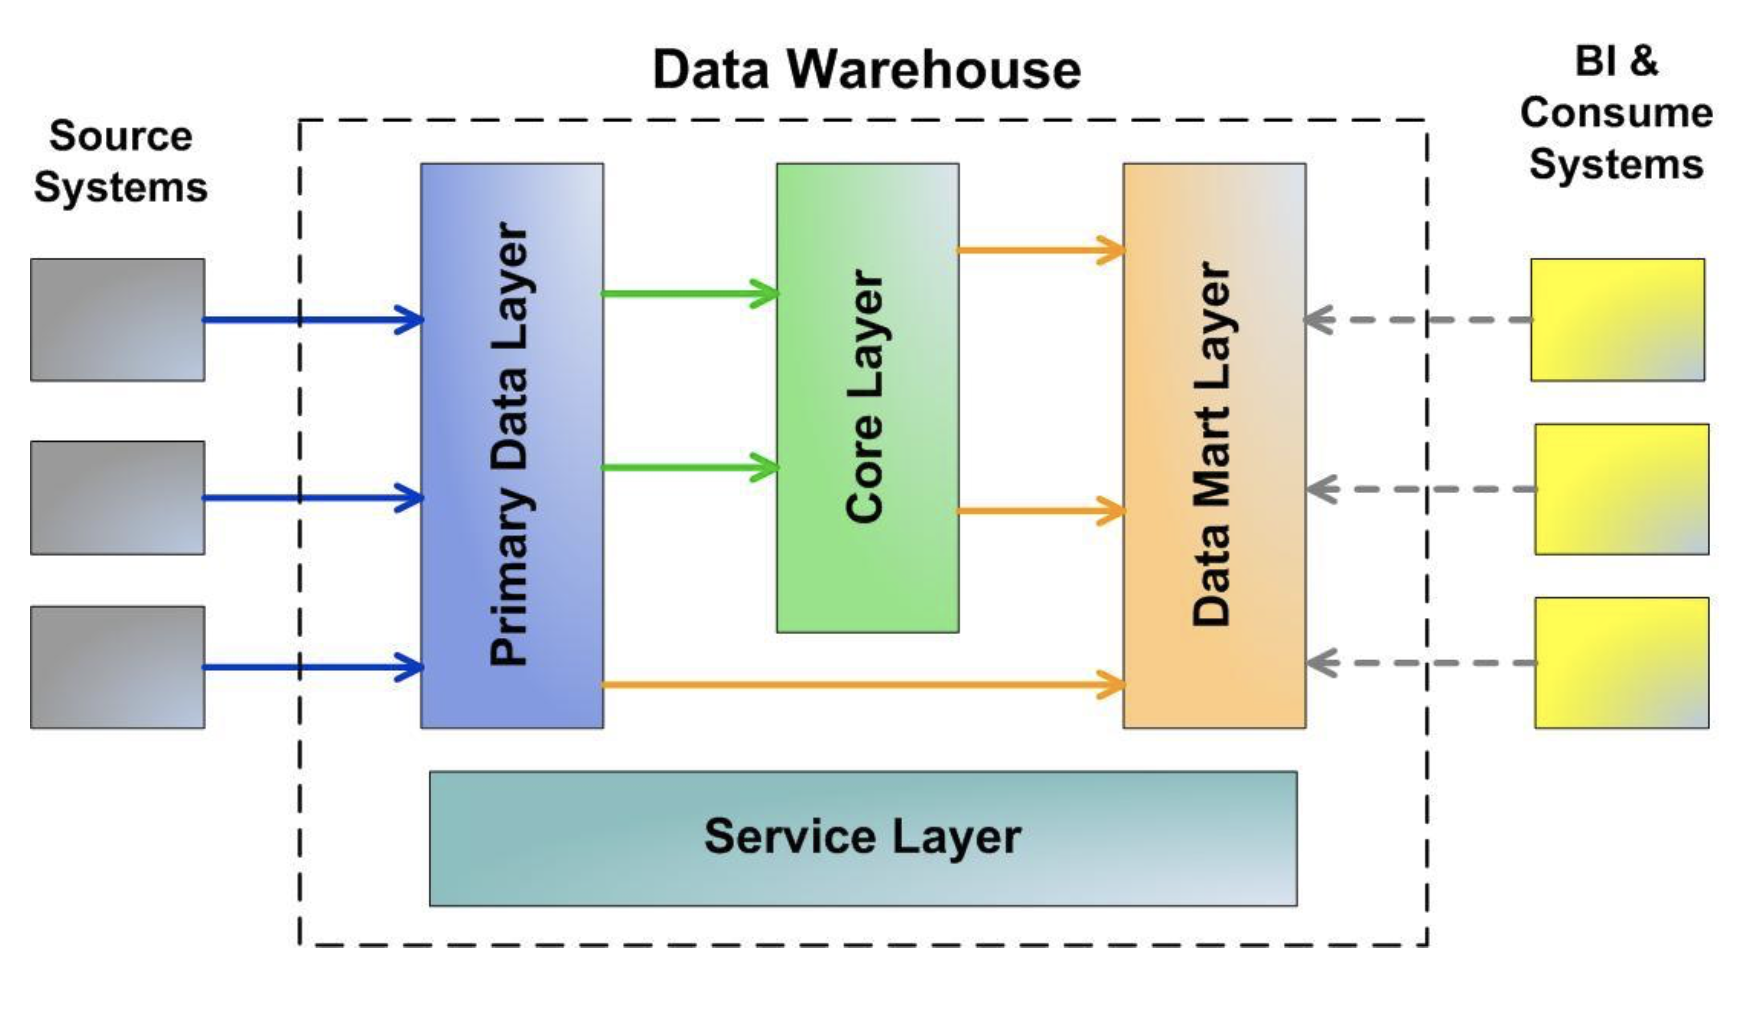

В уровневой архитектуре зачастую выделяют три слоя:

    • Стейджинговый слой (Primary Data Layer)
    • Детальный слой (Core Data Layer, Detail Data Store)
    • Слой Витрин (Data Mart Layer)

**Стейджинговый слой** - предназначен для загрузки из систем-источников и сохранения первичной информации, без трансформаций – в исходном качестве и поддержкой полной истории изменений. Задача данного слоя – абстрагировать последующие слои хранилища от физического устройства источников данных, способов забора данных и методов выделения дельты изменений.

Данные в этом слое хранятся в структурах, максимально близких к системе- источнику (чтобы сохранить первичные данные как можно ближе к их первозданному виду). Стейджинговый слой устроен по принципу «конвейера»: взял данные из источника – положил в свой слой – готов брать следующую порцию.

Процессы загрузки устроены очень просто => их можно очень хорошо оптимизировать и параметризовать, снижая нагрузку на нашу систему и ускоряя процесс подключения источников (время разработки). К тому же мы можем хранить историю загрузок данных. Плюсы от наличия историзируемового стейджинга:

    • возможность ошибиться при разработке детального слоя;
    
    • возможность подумать и не торопиться с проработкой большого фрагмента детального слоя именно в этой итерации развития хранилища;
    
    • возможность анализа – мы сохраним даже те данные, которых уже нет в источнике;
    
    • возможность информационного аудита – благодаря максимально подробной первичной информации мы сможем потом разобраться, что происходило в хранилище (и не только в нем)

**Детальный слой** (Core Data Layer, Detail Data Store) - центральный компонент системы, который отличает хранилище от «большой свалки данных». Здесь осуществляется основная работа с качеством данных – очистка, трансформация, унификация. Абстрагирует дальнейшие слои от:

    • Особенностей логического устройства источников данных
    • Необходимости консолидировать данные из различных систем
    • Необходимости обеспечивать целостность и качество данных
    • Необходимости систематизации данных, приведения их к единым структурам, ключам

**Слой Витрин** (Data Mart Layer) – то, ради чего строится хранилище. Отвечает за подготовку и предоставление данных конечным потребителям – людям или системам.

**Витрины** – денормализованные представления, которые отображают данные о какой-либо сущности с ее связями целиком, так, как это было бы удобно для анализа.
Задача слоя витрин – подготовка данных согласно требованиям конкретного потребителя – BI- платформы, группы пользователей, либо внешней системы.

Такое четкое разделение системы на отдельные компоненты существенно повышает управляемость развития системы:

    • снижается сложность задачи, которая ставится разработчику функционала того, или иного компонента
    • наличие персистентного стейджинга позволяет быстро подключить источники данных, не проектируя целиком ядро, либо витрины для всей предметной области, а далее постепенно достраивать остальные слои согласно приоритетам
    • наличие слоя витрин позволяет не концентрироваться на конечном результате для заказчиков, то есть можно свободно проектировать детальный слой, без оглядки на читаемость и понятность для потребителя данных (пример: мало какие аналитики смогут сходу восстановить плоскую таблицу в анкерной модели, о который вы узнаете на следующем уроке)

## Резюме

Нормализация – процесс декомпозиции отношения, находящегося в предыдущей нормальной форме, на два или более отношений, которые удовлетворяют требованиям следующей нормальной формы.

У сильной и слабой нормализации есть свои плюсы и минусы.

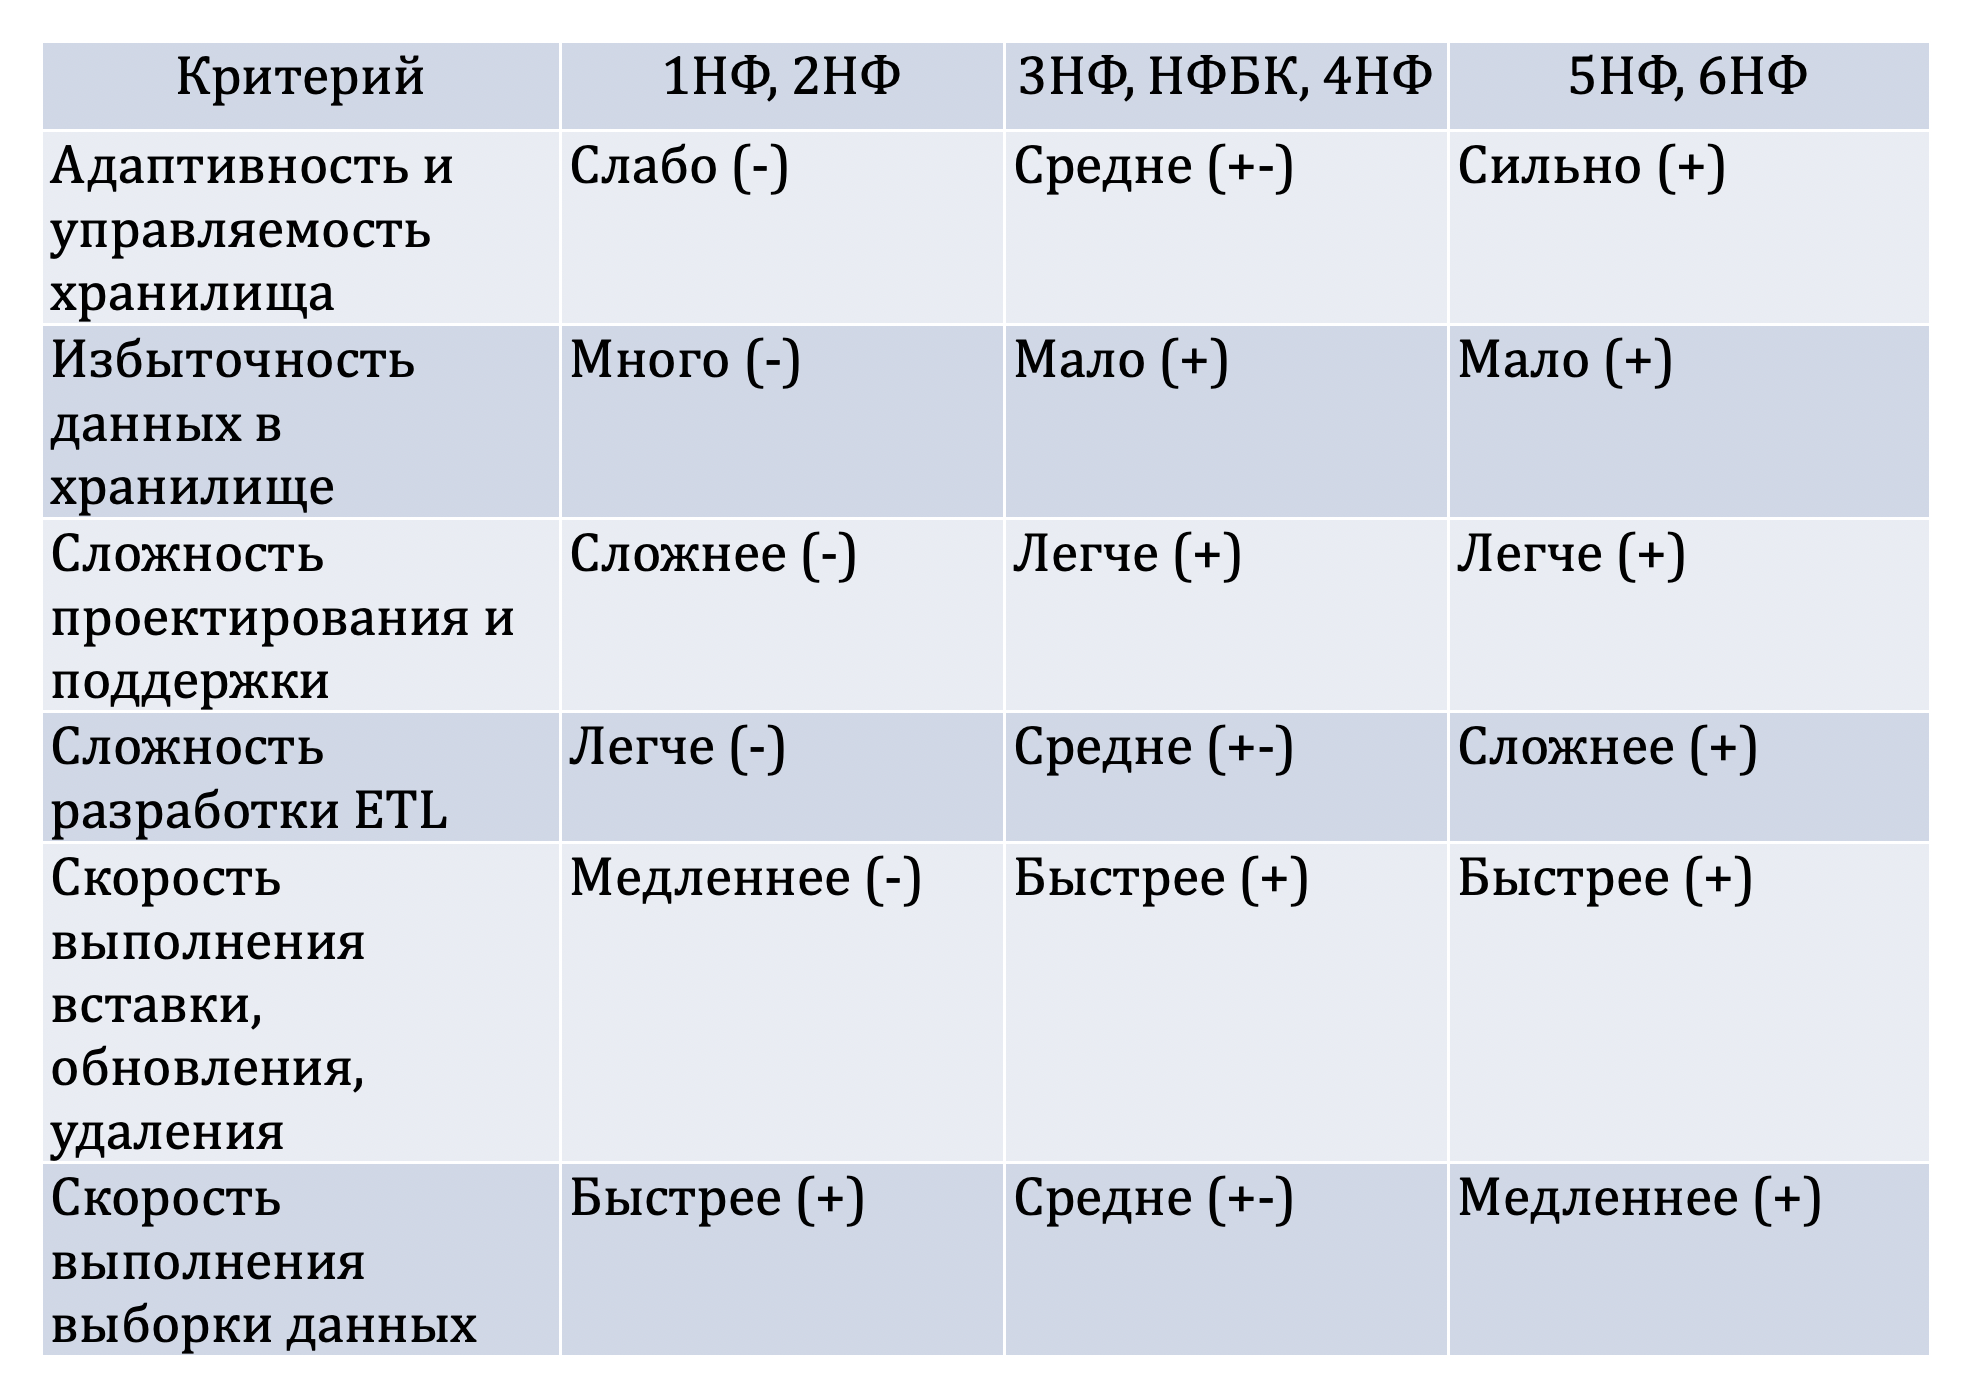

Использование нормальных форм в различных методологиях:

    • 1НФ, 2НФ – денормализованные отношения, используются в хранилищах данных для ускорения доступа
    • 3НФ, НФБК – классические хранилища по схеме снежинка\звезда
    • НФБК, 4НФ – подход Data Vault
    • 5НФ, 6НФ – подход Anchor modeling

Проектирование хранилищ с помощью слойной архитектуры увеличивает затраченное время на проектировку, требует определенных навыков у архитекторов и разработчиков, НО облегчает дальнейшую жизнь команды разработки и последующие дополнения, масштабирование и изменения

Источники:

    • https://habr.com/ru/post/254773/
    • http://citforum.ru/database/osbd/glava_23.shtml
    • https://www.bigdataschool.ru/blog/lsa-data-warehouse-architecture.html

## Домашнее задание

### Привести таблицу к 3НФ:

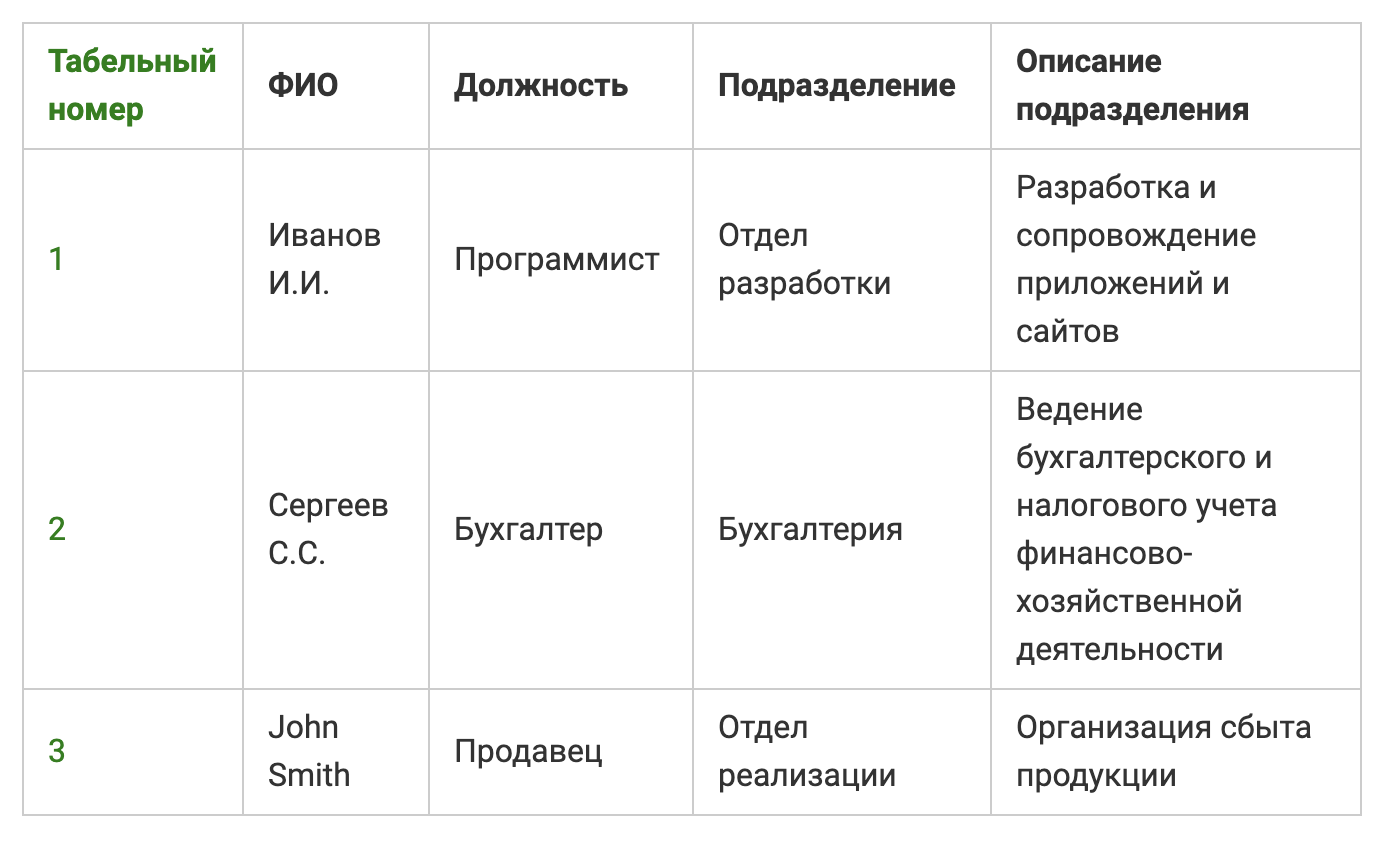

### Привести таблицу к НФБК:

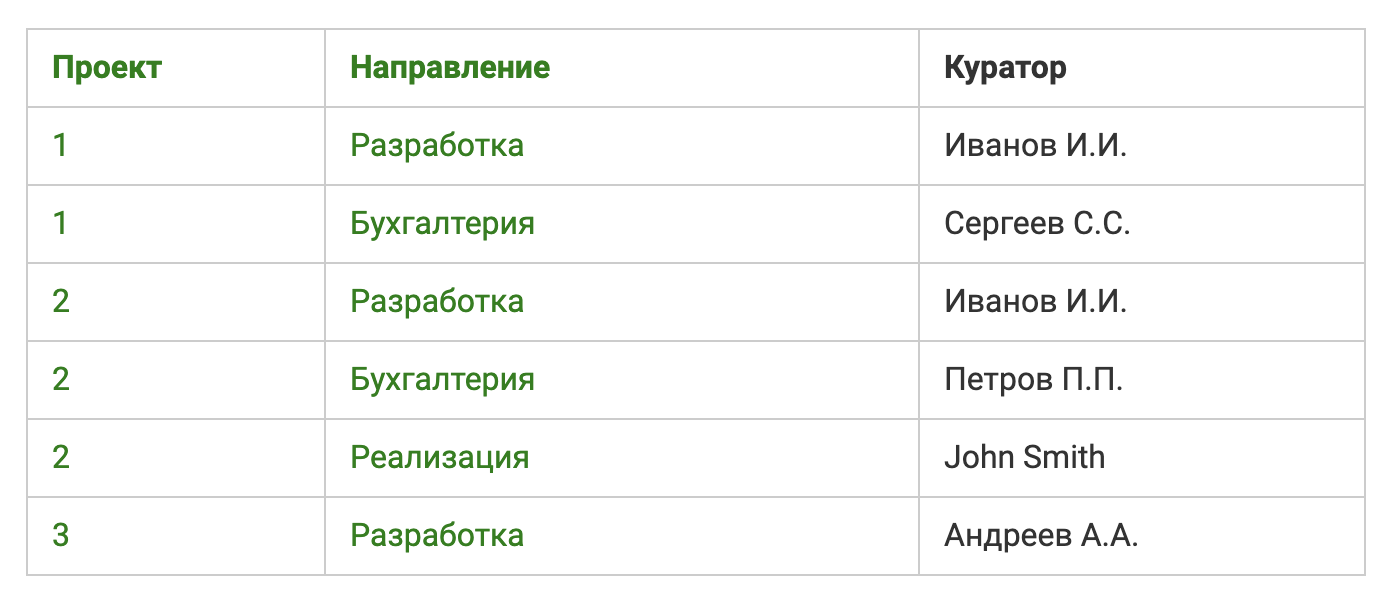

### Привести таблицу к 4НФ:

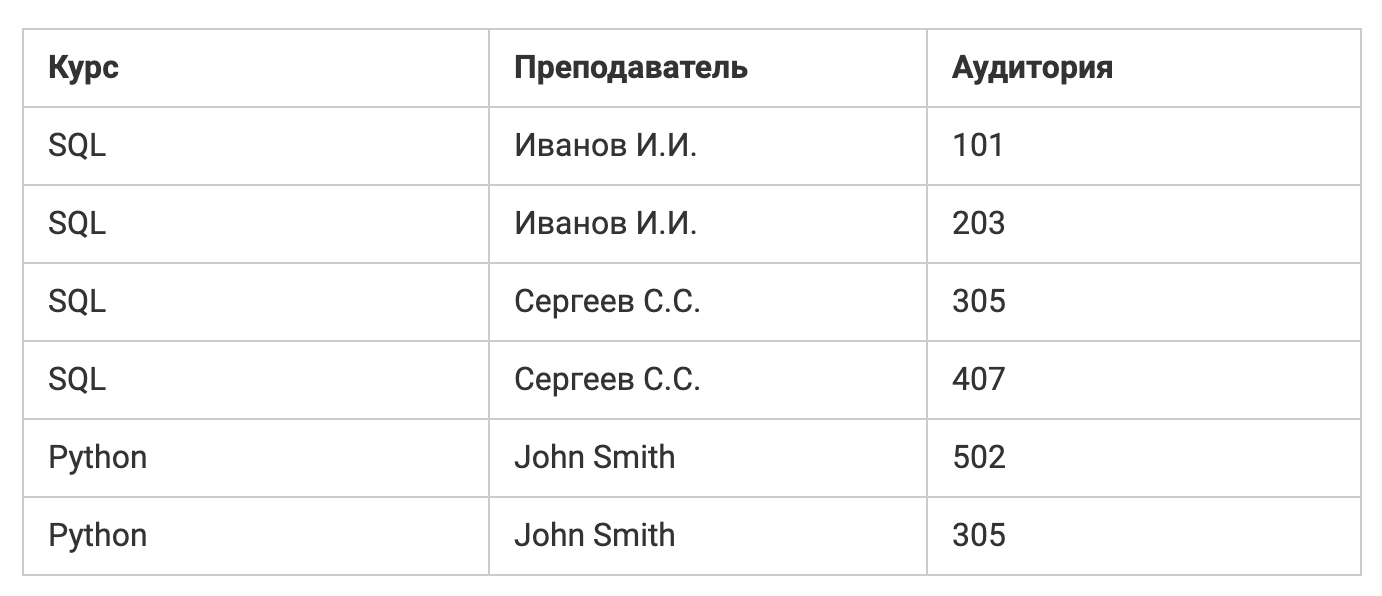

### Привести таблицу к 5НФ:

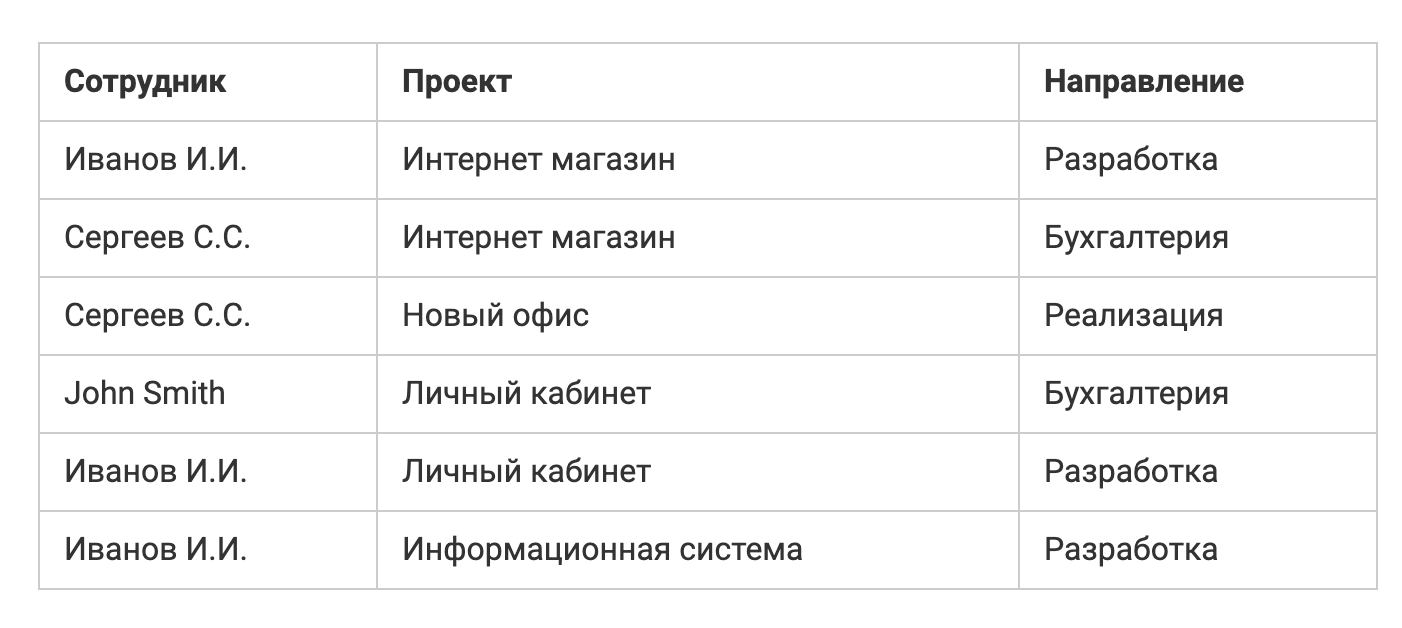

Контекст:
    
    • Иванов И.И. может работать только в направлении «Разработка»
    • Сергеев С.С. может работать в любом направлении, за исключением «Разработка»
    • Иванов И.И. может участвовать в большом количестве проектов
    • John Smith может участвовать только в одном проекте

### Привести таблицу к 6НФ:

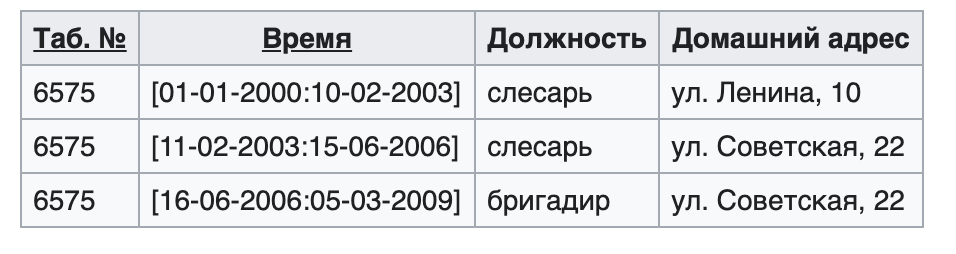